# Análise Descritiva e Insights sobre Dividendos Históricos dentro de um Portfólio de FIIs

## Introdução

Os Fundos Imobiliários (FIIs) são ativos de renda variável que oscilam pouco se comparados com outros ativos de renda variável e além disso distribuem 95% dos seus rendimentos a cada 6 meses. A maioria dos FIIs opta por distribuir mensalmente esses rendimentos, o que os torna uma excelente opção de investimento para geração de renda mensal.

Acontece que saber sobre todos os FIIs nos mínimos detalhes dentro de um portfólio pode ser muito trabalhoso, e nem todos possuem esse tempo necessário, então as vezes fica difícil escolher em qual FII iremos aportar, e a decisão de trazer um novo FII para dentro do portfólio pode não ser a melhor escolha dependendo do momento. Além disso, pode-se estar passando por um mercado de alta, onde poucos papeis podem estar atrativos, o que dificulta ainda mais a escolha.

Nesse caso, o presente estudo irá analisar o histórico de dividendos de um portfólio de FIIs e tentar gerar insights para possíveis aportes dentro desse portfólio, partindo do pressuposto que previamente os FIIs são na maioria conservadores, bons ativos, provados no tempo o que pode permitir deixar nossa carteira de FIIs em piloto automático e ir aportando conforme faça sentido dentro da estratégia escolhida.

Existe quem aporte todos os meses, e existe que espera os ativos ficarem mais atrativos e então realizam o aporte de acordo com que faça sentido para sua carteira. Esse estudo é útil pra quem não aporta todos os meses, quem deseja esperar os ativos ficarem mais atraentes. 
Mas qual seria uma forma de um ativo ficar mais atraente? Bom, dado que seja previamente escolhido um ativo seguro, imaginamos que dentre os principais fatores que podem chamar a atenção dos investidores podem ser os dividendos e o preço sobre valor patrimonial do FII, (mas não é, e não pode ser apenas isso!). Mas dentro do portfólio que já é conservador, pode ser um bom ponto de partida.

Por isso o presente estudo busca responder se dentro de um portfólio existem um ou mais FIIs interessantes para realização de aportes, para isso será utilizado uma base de dados de dividendos históricos extraídos de uma conta no MyProfit (https://myprofitweb.com/) onde vamos olhar para alguns cenários que parecem ser bem interessantes para ao menos nos sinalizar papeis interessantes dentro do portfólio.

Para isso, será necessário alguns campos importantes, tais como Ticker, DY no mês, YOC no mês, Data Pagamento, Valor por Cota e Total Recebido no Mês. 
Com esses campos, independente de onde extraídos, pode-se seguir com o estudo.

Fonte do Dataset: https://myprofitweb.com/

## 1. Importações

In [1]:
#importações
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#definições
slateBlue1 = '#836FFF'

## 2. Leitura dos Dados

In [2]:
#leitura
dados = pd.read_csv('dividendos.csv', decimal=',', thousands='.', parse_dates=['Data pgto.','Data COM'], dayfirst=True)

limite_meses_relatorios = 12

#algumas tratativas

#filtrando pela categoria configurada como Renda Variavel no MyProfitWeb
dados = dados[ dados['Minha Categoria'] == 'Renda Variavel' ]

#eliminando 2 ativos que não existem mais no portfólio, mas que são trazidos na massa de dados
dados = dados[ dados['Ativo'] != 'XPLG11' ]
dados = dados[ dados['Ativo'] != 'HSLG11' ]

#calculando diferença entre DY - YOC e criando nova coluna no DataFrame para posterior utilização
dados['VALOR_DY'] = dados['DY'].str.replace(' %','').astype(float)
dados['VALOR_YOC'] = dados['YOC'].str.replace(' %','').astype(float)
dados['YOC_DY'] = dados['VALOR_DY'] - dados['VALOR_YOC']

#criando coluna ano_mes
dados['ano_mes'] = dados['Data pgto.'].apply(lambda x: int(f"{x.year}{x.month}"))

#tratando valor por cota para posterior utilização
dados['VALOR_DY_COTA'] = dados['Valor por cota'].str.replace('R$ ','').str.replace(',','.').astype(float)

dados = dados.sort_values('Data pgto.', ascending=False)


In [3]:
dados.shape

(321, 13)

In [4]:
dados.isnull().sum()

Ativo              0
Minha Categoria    0
Recebido           0
Data pgto.         0
Data COM           0
YOC                0
DY                 0
Valor por cota     0
VALOR_DY           0
VALOR_YOC          0
YOC_DY             0
ano_mes            0
VALOR_DY_COTA      0
dtype: int64

In [5]:
dados.describe()

,Data pgto.,Data COM,VALOR_DY,VALOR_YOC,YOC_DY,ano_mes,VALOR_DY_COTA
count,321,321,321.000000,321.000000,321.000000,321.000000,321.000000
mean,2022-11-24 19:35:19.626168320,2022-11-11 17:38:41.495326976,0.846386,0.841963,0.004424,66151.557632,0.613178
min,2020-02-14 00:00:00,2020-01-31 00:00:00,0.380000,0.360000,-0.130000,20202.000000,0.060000
25%,2022-02-14 00:00:00,2022-01-31 00:00:00,0.690000,0.680000,-0.040000,20226.000000,0.140000
50%,2023-03-14 00:00:00,2023-02-28 00:00:00,0.820000,0.810000,0.000000,20238.000000,0.560000
75%,2023-11-14 00:00:00,2023-10-31 00:00:00,0.990000,1.010000,0.040000,202010.000000,0.920000
max,2024-05-15 00:00:00,2024-05-08 00:00:00,1.430000,1.420000,0.180000,202312.000000,1.510000
std,NaN,NaN,0.220335,0.230257,0.060045,79168.974922,0.376138


In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 0 to 455
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Ativo            321 non-null    object        
 1   Minha Categoria  321 non-null    object        
 2   Recebido         321 non-null    object        
 3   Data pgto.       321 non-null    datetime64[ns]
 4   Data COM         321 non-null    datetime64[ns]
 5   YOC              321 non-null    object        
 6   DY               321 non-null    object        
 7   Valor por cota   321 non-null    object        
 8   VALOR_DY         321 non-null    float64       
 9   VALOR_YOC        321 non-null    float64       
 10  YOC_DY           321 non-null    float64       
 11  ano_mes          321 non-null    int64         
 12  VALOR_DY_COTA    321 non-null    float64       
dtypes: datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 35.1+ KB


In [7]:
dados.head()

,Ativo,Minha Categoria,Recebido,Data pgto.,Data COM,YOC,DY,Valor por cota,VALOR_DY,VALOR_YOC,YOC_DY,ano_mes,VALOR_DY_COTA
0,BCFF11,Renda Variavel,"R$ 210,21",2024-05-15,2024-05-08,0.79 %,0.77 %,"R$ 0,07",0.77,0.79,-0.02,20245,0.07
5,RZAG11,Renda Variavel,"R$ 46,30",2024-05-15,2024-05-01,1.11 %,1.21 %,"R$ 0,10",1.21,1.11,0.10,20245,0.10
7,VISC11,Renda Variavel,"R$ 72,00",2024-05-15,2024-05-01,0.92 %,0.83 %,"R$ 1,00",0.83,0.92,-0.09,20245,1.00
6,TGAR11,Renda Variavel,"R$ 80,40",2024-05-15,2024-05-01,1.14 %,1.06 %,"R$ 1,34",1.06,1.14,-0.08,20245,1.34
1,KNRI11,Renda Variavel,"R$ 104,00",2024-05-15,2024-05-01,0.68 %,0.61 %,"R$ 1,00",0.61,0.68,-0.07,20245,1.00


## 3. Sobre Criação de Indicador auxiliar DY - YOC dos FIIs

Vamos propor a criação de **indicador auxiliar DY - YOC** que nada mais é do calcular o Dividendo do mês menos o Yield on Cost do mês.
Se esse indicador for positivo, indica um aumento nos dividendos ou uma queda na cotação do ativo, e dependendo de uma análise qualitativa no ativo que atender a esse cenário, pode valer apena o aporte.

**Cenário 1 - Dividendo estável, e queda da cotação**
Se possuirmos 10 cotas do ativo ABC123 custando 100,00 cada uma, e mensalmente recebemos 1,00 em dividendos por cota, então nosso YOC é 1.00 (1,00 / 100,00) X 100.
Agora imaginemos que o valor da cota do ativo ABC123 caiu para 95,00, mas os dividendos permanecem os mesmos 1,00 por cota, agora passamos a ter
um DY maior que o YOC, a saber um DY de 1.05 (1,00 / 95,00) X 100 maior que o YOC de 1.00. Isso graças a queda da cotação de 
100,00 para 95,00. Isso mostra um cenário favorável já que o que caiu foi a cotação do ativo, e não o dividendo.

**Cenário 2 - Cotação e dividendos estáveis ou subindo**
Os ativos que não se encaixarem no cenário 1, pode ter tido a cotação subindo, ou o dividendo subindo, ou os dois. Apenas uma condição interessa nesse cenário 2, quando a cotação ficou relativamente estável, e o dividendo vem crescendo e se mantendo nesse patamar. Imaginemos agora que a cotação permaneceu em 100,00 e o dividendo cresceu para 1,10, nesse caso o DY também passa a ser maior que o YOC, o DY vale 1.10 (1,10 / 100,00) X 100.

Em resumo, **quando indicador for positivo** existe uma chance de diminuir o Yield on Cost geral do FII na carteira, o que é muito bom já que estaremos pagando menos por dividendos estáveis ou até crescentes. Por outro lado, **quando o indicador for negativo**, o Yield on Cost geral do FII na carteira irá aumentar, pois estaremos pagando mais caro pelos mesmos dividendos.

Por esse motivo, abaixo os ativos estão sendo agrupados, considerando as distribuições dos ultimos 12 meses, calculando o percentual de ocorrências para cada ativo onde essa relação DY - YOC é positiva, e esses ativos com essa relação positiva são os que nos interessam, porque ou a cotação caiu e o dividendo é estável, ou a cotação se manteve relativamente estável e o dividendo cresceu.


In [8]:
ativos = dados['Ativo'].unique()

relatorio_dy_yoc = []

for i, a in enumerate(ativos):    
    
    registros_ativo = dados[ dados['Ativo'] == a ][:limite_meses_relatorios]
    registros_positivos = registros_ativo[ registros_ativo['YOC_DY'] > 0.0 ]
    total_registros_ativo = len(registros_ativo)
    total_registros_positivos = len(registros_positivos)
    parcial_positivos = (total_registros_positivos / total_registros_ativo) * 100
    
    relatorio_dy_yoc.append({'Ativo':a, 'Últimos Meses':total_registros_ativo, 'Positivos':total_registros_positivos,'Parcial Positivos':round(parcial_positivos, 2)})

df_relatorio = pd.DataFrame(relatorio_dy_yoc).sort_values(by='Parcial Positivos', ascending=False)

display(df_relatorio)

,Ativo,Últimos Meses,Positivos,Parcial Positivos
9,GGRC11,11,10,90.91
1,RZAG11,12,9,75.00
10,HSML11,11,1,9.09
0,BCFF11,12,1,8.33
6,MXRF11,12,1,8.33
2,VISC11,12,0,0.00
3,TGAR11,12,0,0.00
4,KNRI11,12,0,0.00
5,RBVA11,12,0,0.00
7,RBFF11,12,0,0.00


Podemos notar que os FIIs GGRC11, RZAG11, HSML11, BCFF11 e MXRF11 apresentaram nos últimos 12 meses ao menos uma vez o indicador com valor positivo.

### 3.1 Distribuição de Dividendos dos Ativos com Indicador Positivo

Agora, filtrando apenas os ativos com relação DY - YOC positiva são exibidas algumas visulizações para cada ativo, onde:

- Checamos a frequência nos valores distribuidos para confirmar se houve muita variação os dividendos pagos,
- Notamos um histórico dos dividendos nos últimos 12 meses, para averiguar se cresceram ou diminuiram,
- Visualizamos o **indicador auxiliar DY - YOC** nos últimos 3 meses, para ver o comportamento recente

No fim essas 3 visualizações vão nos ajudar a gerar insights.

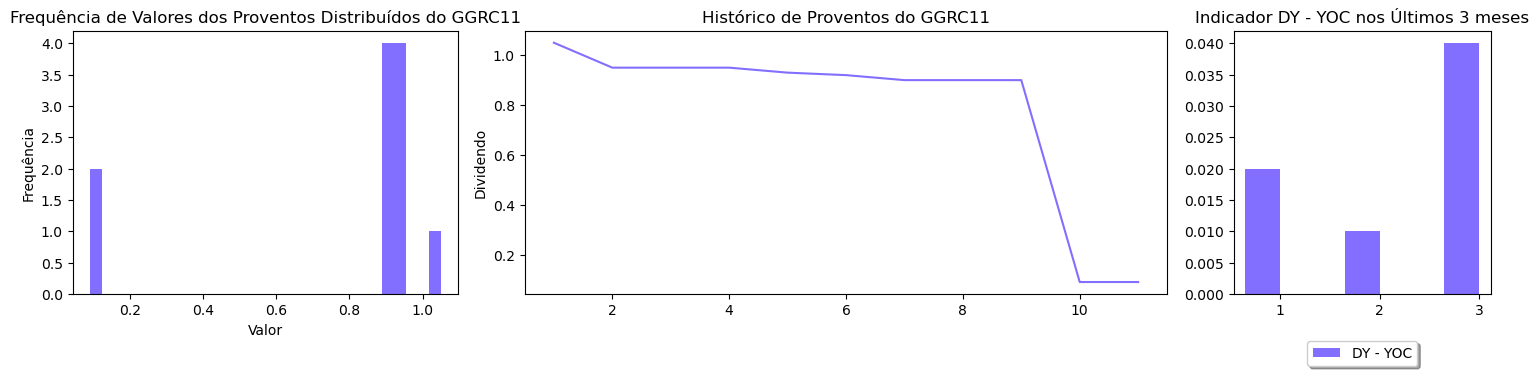

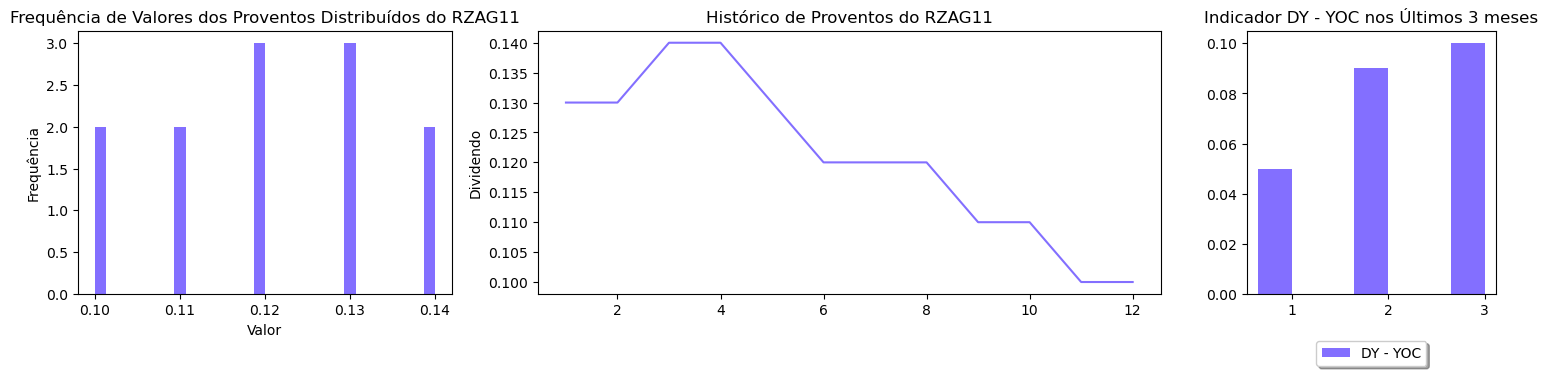

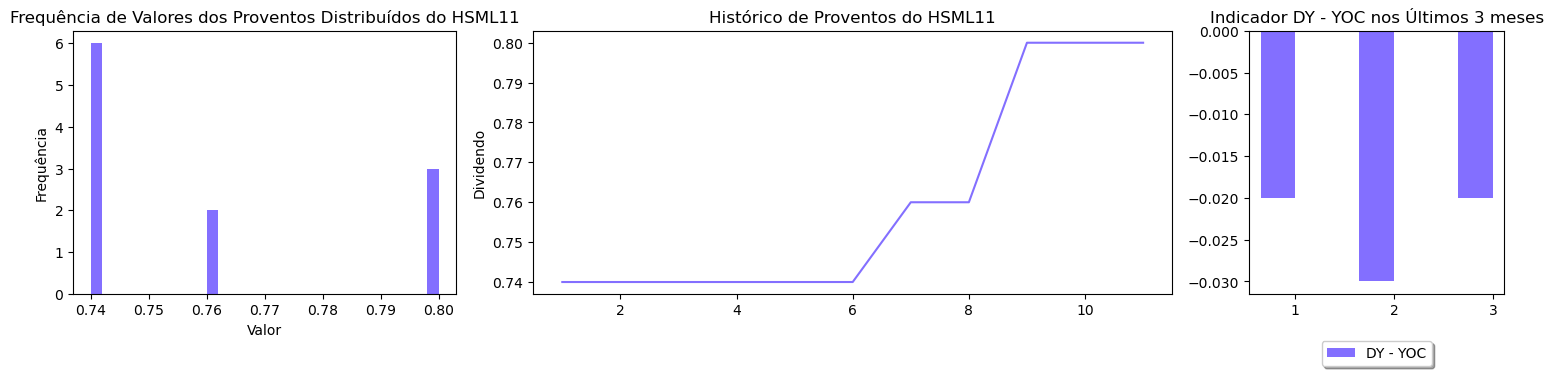

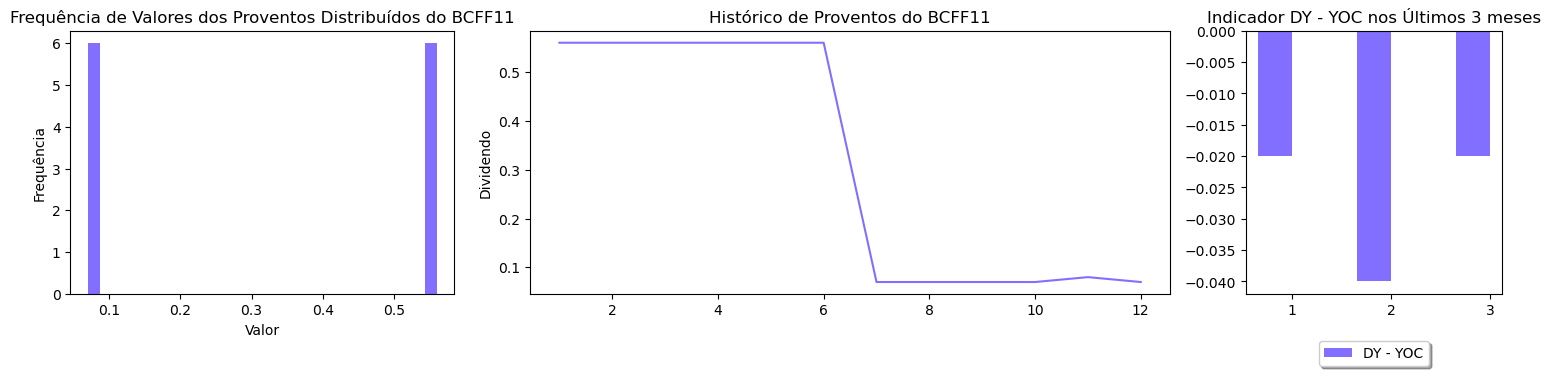

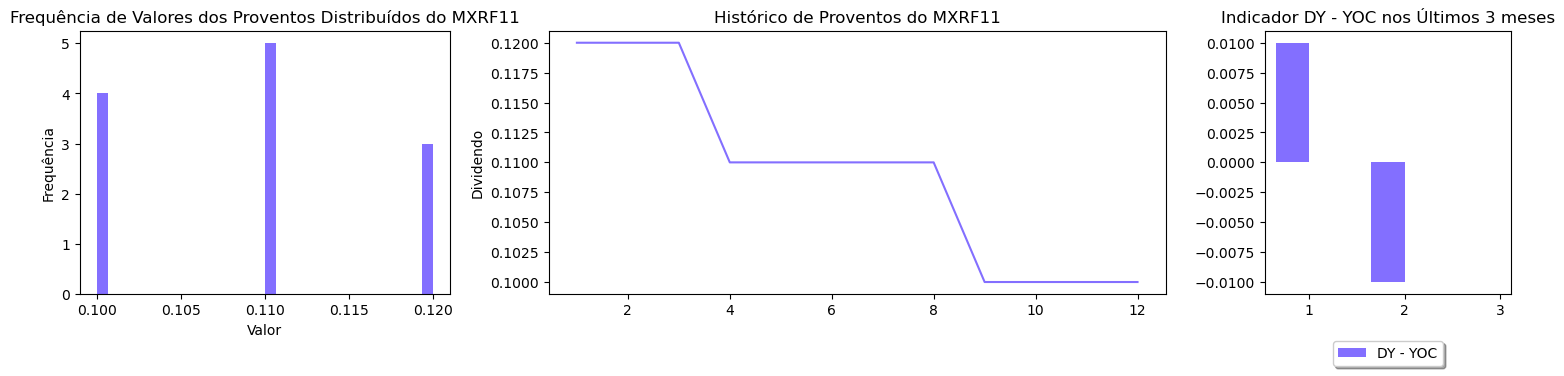

In [9]:
ativos_relacao_positiva = df_relatorio[df_relatorio['Parcial Positivos'] > 0.0]
 
for a in ativos_relacao_positiva['Ativo'].unique():
    
    filtro = dados['Ativo'] == a
    registros = dados[filtro][:limite_meses_relatorios]
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 4), gridspec_kw={'width_ratios': [3, 5, 2]})

    #exibindo gráfico de distribuição para analisar variação dos dividendos
    axs[0].hist(registros['VALOR_DY_COTA'], bins=30, color=slateBlue1)
    axs[0].set_title('Frequência de Valores dos Proventos Distribuídos do ' + a)
    axs[0].set_xlabel('Valor')
    axs[0].set_ylabel('Frequência')
    
    #ordenar os registros do ativo em asc pela data pagamento
    registros = registros.sort_values(by='Data pgto.', ascending=True)
    
    #exibindo gráfico de linhas com histórico dos dividendos
    axs[1].plot(np.arange(1,len(registros)+1), registros['VALOR_DY_COTA'], color=slateBlue1)
    axs[1].set_title('Histórico de Proventos do ' + a)
    axs[1].set_ylabel('Dividendo')

    #exibir gráfico mostrar ultimas 3 relações DY - YOC
    dados_ultimas_dyoc = registros[len(registros)-3:]
    
    largura = 0.35
    indices = np.arange(3)
    
    axs[2].set_title('Indicador DY - YOC nos Últimos 3 meses')
    axs[2].bar(indices - largura/2, dados_ultimas_dyoc['YOC_DY'], largura, label='DY - YOC', color=slateBlue1)
    axs[2].set_xticks(indices)
    axs[2].set_xticklabels(np.arange(1,4))
    
    axs[2].legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=2)

    plt.tight_layout()

    plt.show()


**Pontos importantes sobre as visualizações dos ativos com indicador positivo**

- Os Ativos **GGRC11 e RZAG11** apresentam o indicador **DY - YOC positivo** nos últimos 3 meses
- Desses 2 ativos, o **GGRC11** possui uma boa frequência (maior parte entre 0,90 e 1,00) de dividendos sem variações importantes (exceto pelo recente desdobramento de cotas), portanto pode ser um boa opção de aporte
- No caso do **RZAG11** nos últimos 3 meses **o indicador foi positivo**, porém nós temos **bastante variação na distribuição** de dividendos, além disso, um **histórico recente de quedas** nos dividendos (de 0,14 para 0,10), então **é importante uma análise nos fundamentos desse fundo**
- **MXRF11** apresenta esse indicador próximo de neutro, com uma **boa análise** esse fundo pode ser uma **opção de aporte**, mas **MXRF11** também apresenta queda nos dividendos nos últimos 12 meses
- Os ativos **BCFF11 e HSML11** apresentam **pouca variação** e **bom historico dos dividendos**, porém o **indicador é negativo** para ambos nos 3 últimos meses, ambos podem ser um opção de aporte mas só depois de um exame mais cauteloso já que podem tornar o YOC mais caro

### 3.2 Distribuição de Dividendos dos Ativos com Indicador Negativo ou Neutro

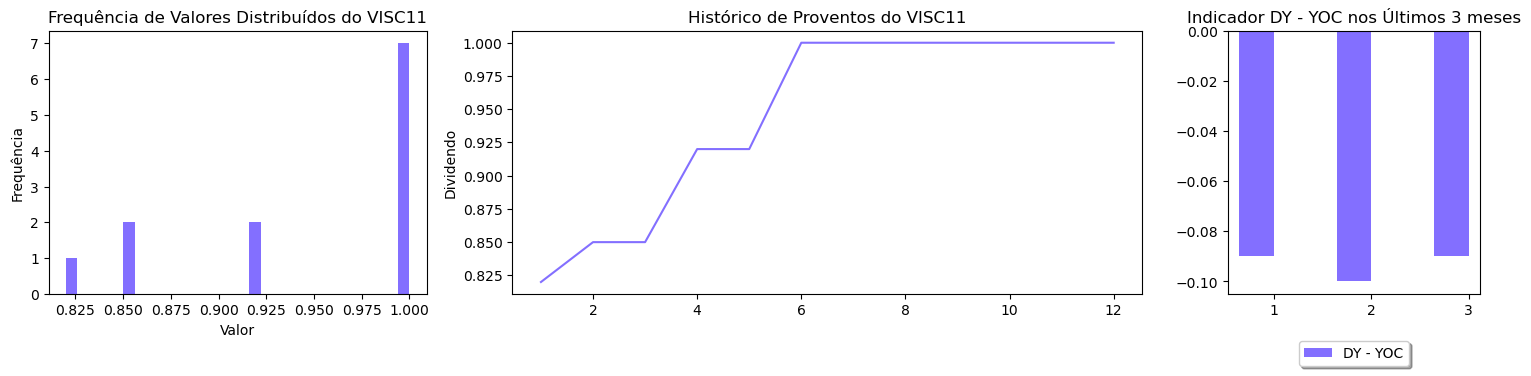

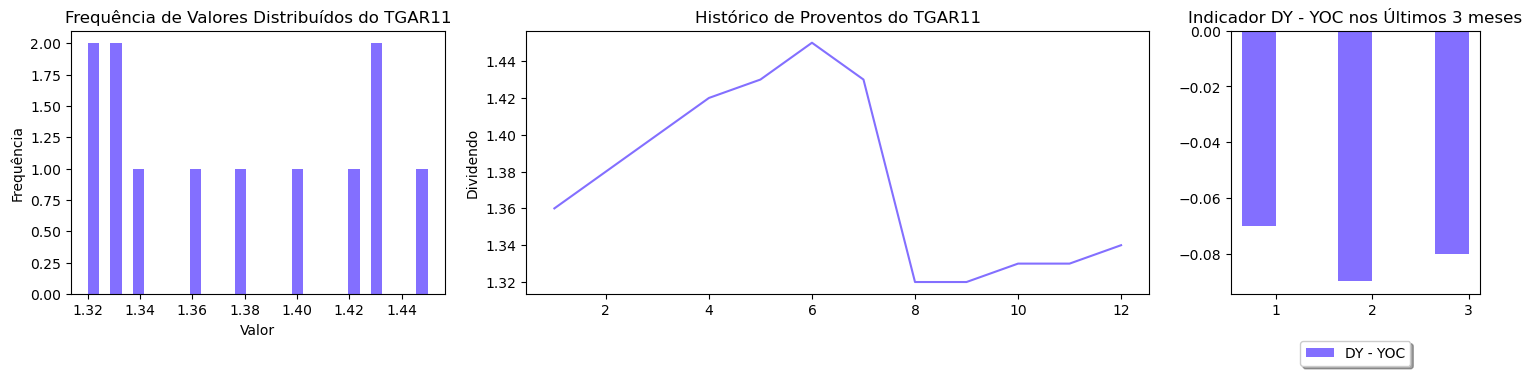

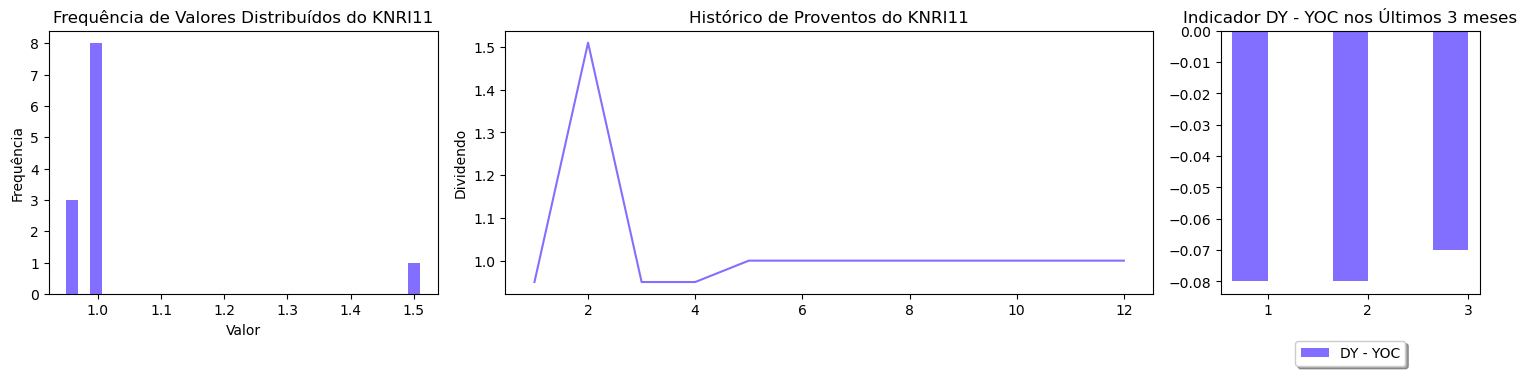

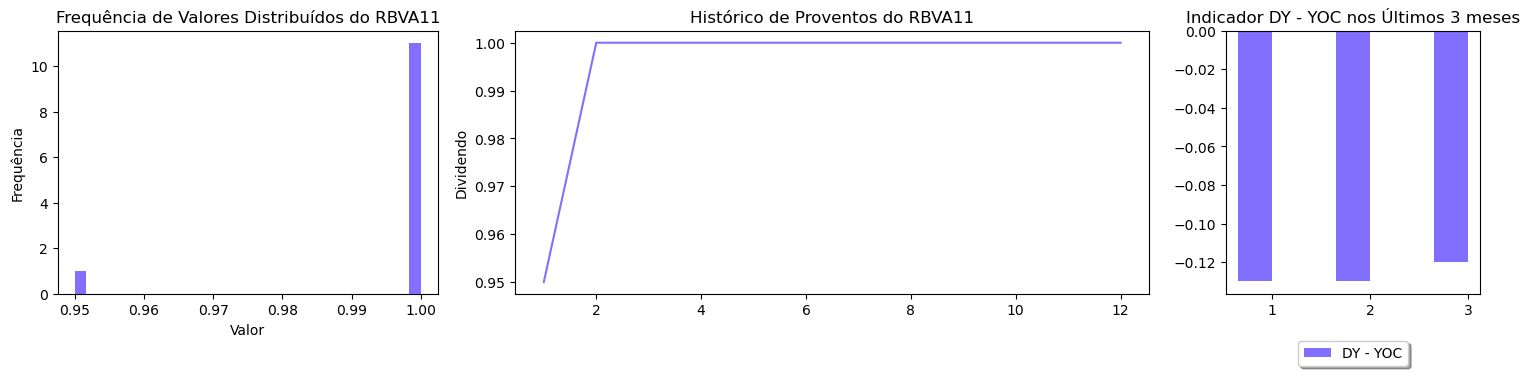

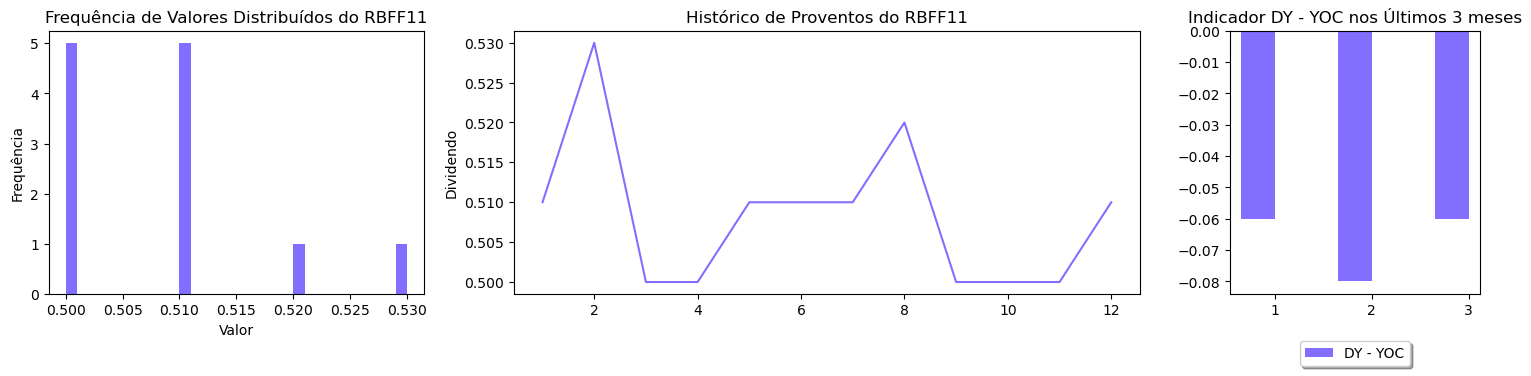

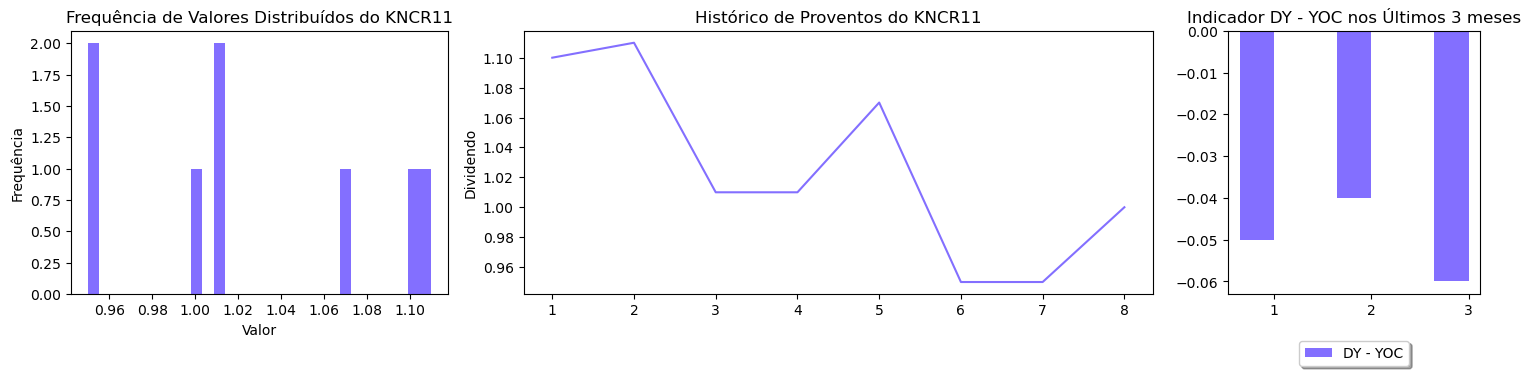

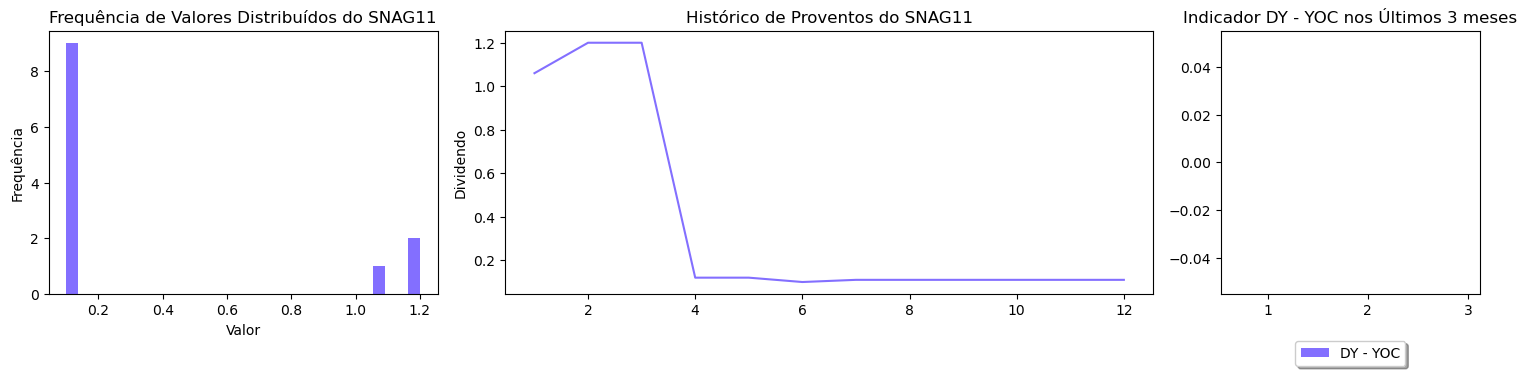

In [10]:
ativos = df_relatorio[df_relatorio['Parcial Positivos'] <= 0.0]
    
for a in ativos['Ativo'].unique():
    
    filtro = dados['Ativo'] == a
    registros = dados[filtro][:limite_meses_relatorios]

    fig, axs = plt.subplots(1, 3, figsize=(15, 4), gridspec_kw={'width_ratios': [3, 5, 2]})

    #exibindo gráfico de distribuição para analisar variação dos dividendos
    axs[0].hist(registros['VALOR_DY_COTA'], bins=30, color=slateBlue1)
    axs[0].set_title('Frequência de Valores Distribuídos do ' + a)
    axs[0].set_xlabel('Valor')
    axs[0].set_ylabel('Frequência')
    
    #ordenar os registros do ativo em asc pela data pagamento
    registros = registros.sort_values(by='Data pgto.', ascending=True)
    
    #exibindo gráfico de linhas com histórico dos dividendos
    axs[1].plot(np.arange(1,len(registros)+1), registros['VALOR_DY_COTA'], color=slateBlue1)
    axs[1].set_title('Histórico de Proventos do ' + a)
    axs[1].set_ylabel('Dividendo')

    #exibir gráfico mostrar ultimas 3 relações DY - YOC
    dados_ultimas_dyoc = registros[len(registros)-3:]
    
    largura = 0.35
    indices = np.arange(3)
    
    axs[2].set_title('Indicador DY - YOC nos Últimos 3 meses')
    axs[2].bar(indices - largura/2, dados_ultimas_dyoc['YOC_DY'], largura, label='DY - YOC', color=slateBlue1)
    axs[2].set_xticks(indices)
    axs[2].set_xticklabels(np.arange(1,4))
    
    axs[2].legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), fancybox=True, shadow=True, ncol=2)
    
    plt.tight_layout()

    plt.show()


**Pontos importantes sobre as visualizações dos ativos com indicador negativo**

- **VISC11** possui um pouco de variação nos dividendos (na maioria entre 0,93 e 1,00) mas é por conta do crescimento nos dividendos, o indicador para VISC11 é negativo, mas pode ser uma boa opção de aporte devido bom histórico de dividendos
- **KNRI11 e RBVA11** ambos apresentam variação mínima e dividendos muito estáveis (na maioria entre 0,95 e 1,00), o indicador é negativo porém a frequência nos valores distribuídos e o histórico de proventos são excelentes (no quisito estabilidade)
- **SNAG11** apresenta variação mínima nos proventos (exceto pelo desdobramento de cotas), possui bom histórico de dividendos e o único FII na carteira que possui indicador neutro nos últimos 3 meses, onde DY sempre foi igual ao YOC

## 4. Conclusão

Após análise, os seguintes fundos se destacam para um possível aporte:

**Indicador Positivos**
- GGRC11 analisar para possível aporte, baixar relatório entender mais o momento do fundo
- RZAG11 importante revisar os fundamentos, pois tem quedas na cotação e nos dividendos, pode ser uma oportunidade de aumentar a posição ou um mau negócio
- BCFF11, HSML11 são fundos que por possuirem bom histórico de dividendos e pouca variação podem justificar algum aporte

**Inidicador Negativos**
- VISC11, KNRI11 e RBVA11 são fundos que por possuirem bom histórico de dividendos e pouca variação podem justificar algum aporte
- SNAG11 foi o único fundo com indicador neutro e tem dividendos estáveis, um aporte pode ser interessante

Por fim, importante destacar que dentro de um portfólio conservador, esse estudo deve ser apenas um ponto de partida, onde uma vez que gerados os insigts para **possíveis aportes** é mandatório levantar mais informações que sobre os ativos aqui destacados, já que se esse modelo de análise visa em um vasto portfólio de FIIs chamar atenção para uma minoria de FIIs que no momento parecem interessantes.